# Churchland Widefield Data

This notebook demonstrates:
- Decoding L/R choice from different periods of the delay period

Run this with access to the engram

In [1]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
from LearningSession import *
from LearningChoicePredictor import *

# Single Session

## 0. Specify the mouse and session date you are looking at

In [2]:
mouse = "mSM63"
days = os.listdir("/home/chingf/engram/data/musall/learning/neural/mSM63")
days = [d for d in days if "2018" in d]
days.sort(key = lambda date: datetime.strptime(date, '%d-%b-%Y')) 

In [3]:
session = LearningSession(mouse, days[20], access_engram=True, load_neural=True)
pred = LRChoice(session,reduce_dim=True)

## 1. Load data for decoding with all regions

In [24]:
results = pickle.load(
    open("pickles/choicedecodingreduce1.0_learning_mSM63.p", "rb")
    )

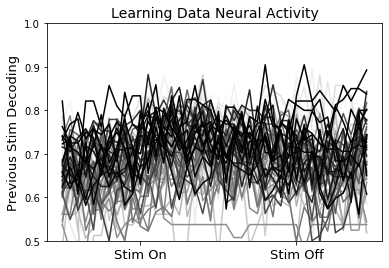

In [25]:
# Plots choice decoding, colored by time
import matplotlib.pylab as pl
plt.figure()
dates_of_interest = days[:-10]
colors = pl.cm.Greys(np.linspace(-0.1,1.1,len(dates_of_interest)))
for idx, date in enumerate(dates_of_interest):
    result = results[idx]
    if result['models'][0] is None:
        continue
    num_test_trials = result['test_indices'][0].size
    min_num_trials = 200 # Test and train trials
    if num_test_trials < min_num_trials*0.2:
        continue
    plt.plot(result['scores'], color=colors[idx])
plt.ylim((0.5,1.0))
plt.title("Learning Data Neural Activity", fontsize=14)
plt.ylabel("Previous Stim Decoding", fontsize=13)
plt.xticks(
    [10,30],
    ['Stim On', 'Stim Off'],
    fontsize=13
    )
plt.show()

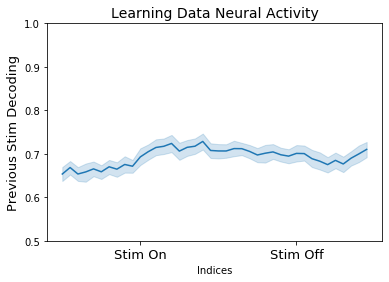

In [26]:
# Plots choice decoding averaged
plt.figure()
indices = []
scores = []
dates_of_interest = days[:-10]
for idx, date in enumerate(dates_of_interest):
    result = results[idx]
    if result['models'][0] is None:
        continue
    num_test_trials = result['test_indices'][0].size
    min_num_trials = 200 # Test and train trials
    if num_test_trials < min_num_trials*0.2:
        continue
    for s_idx, score in enumerate(result['scores']):
        indices.append(s_idx)
        scores.append(score)
df = pd.DataFrame({
    "Indices": indices, "Scores": scores
    })
sns.lineplot(x="Indices", y="Scores", data=df)
plt.ylim((0.5,1.0))
plt.title("Learning Data Neural Activity", fontsize=14)
plt.ylabel("Previous Stim Decoding", fontsize=13)
plt.xticks(
    [10,30],
    ['Stim On', 'Stim Off'],
    fontsize=13
    )
plt.show()


## 2. Load data for LOO decoding

In [27]:
results[0].keys()

dict_keys(['scores', 'models', 'test_indices', 'correct_test_indices'])

In [28]:
num_comps = []
for result in results:
    for model in result["models"]:
        if model is None:
            continue
        num_comps.append(model.coef_.size)

(array([  30.,    0.,    0.,   80.,  250., 1210.,  890.,  420.,  120.,
          80.]),
 array([198. , 212.4, 226.8, 241.2, 255.6, 270. , 284.4, 298.8, 313.2,
        327.6, 342. ]),
 <a list of 10 Patch objects>)

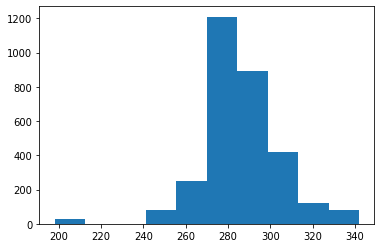

In [29]:
plt.hist(num_comps)

In [7]:
loo_results = pickle.load(
    open("pickles/choicedecodingloo_learning_mSM63.p", "rb")
    )

In [8]:
def plot_region_loo(frame_indices, title, day_range=None):
    if day_range is None:
        day_range = range(len(loo_results))
    region_loo_scores = [] # Will store difference in predictive power
    regions = []
    for day_idx in day_range:
        loo_result = loo_results[day_idx]
        all_result = results[day_idx]
        for region in loo_result.keys():
            region_result = loo_result[region]
            for frame_idx in frame_indices:
                all_result_score = all_result['scores'][frame_idx]
                region_score = region_result['scores'][frame_idx]
                region_loo_scores.append(
                    region_score - all_result_score
                    )
                regions.append(region)
    df = pd.DataFrame({
        "regions": regions, "scores": region_loo_scores
        })
    plt.figure(figsize=(10,6))
    sns.barplot(x="regions", y="scores", data=df)
    plt.title(title)
    plt.ylabel("Change in Predictive Accuracy")
    plt.xlabel("Region")
    plt.show()

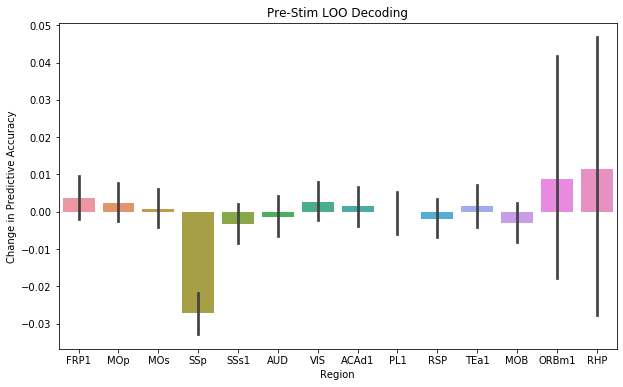

In [42]:
plot_region_loo(np.arange(9), "Pre-Stim LOO Decoding")

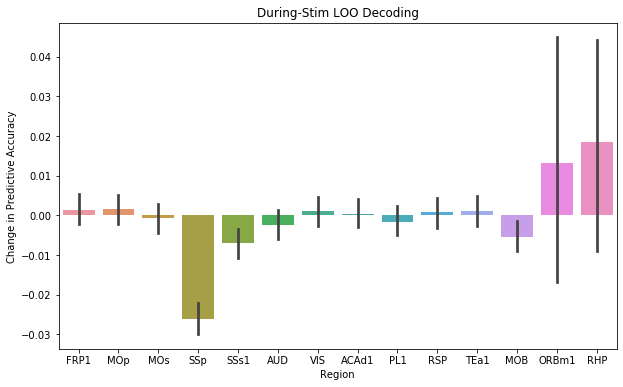

In [12]:
plot_region_loo(np.arange(11,30), "During-Stim LOO Decoding")

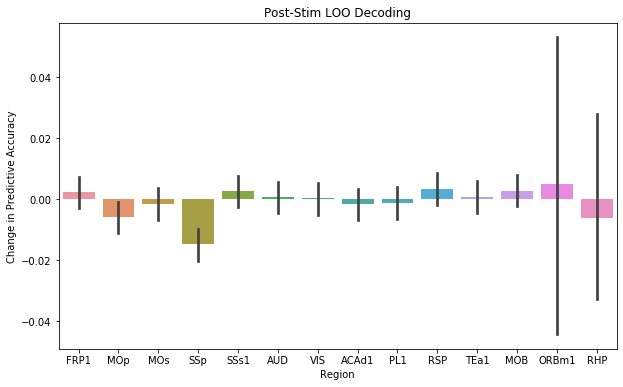

In [13]:
plot_region_loo(np.arange(31,40), "Post-Stim LOO Decoding")

## 3. Load data for LOI decoding

In [54]:
loi_results = pickle.load(
    open("pickles/choicedecodingloi_learning_mSM63.p", "rb")
    )

In [55]:
def plot_region_loi(frame_indices, title, day_range=None):
    if day_range is None:
        day_range = range(len(loi_results))
    region_loi_scores = [] # Will store difference in predictive power
    regions = []
    for day_idx in day_range:
        loi_result = loi_results[day_idx]
        all_result = results[day_idx]
        for region in loi_result.keys():
            region_result = loi_result[region]
            for frame_idx in frame_indices:
                region_score = region_result['scores'][frame_idx]
                region_loi_scores.append(region_score)
                regions.append(region)
    df = pd.DataFrame({
        "regions": regions, "scores": region_loi_scores
        })
    plt.figure(figsize=(10,6))
    sns.barplot(x="regions", y="scores", data=df)
    plt.title(title)
    plt.ylabel("Change in Predictive Accuracy")
    plt.xlabel("Region")
    plt.axhline(0.55, color="black")
    plt.ylim((0.47, 0.7))
    plt.show()

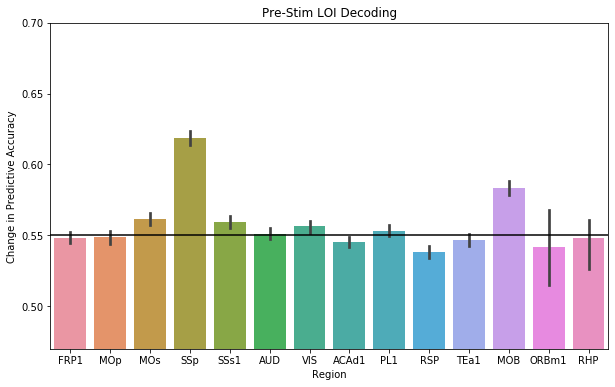

In [56]:
plot_region_loi(np.arange(9), "Pre-Stim LOI Decoding")

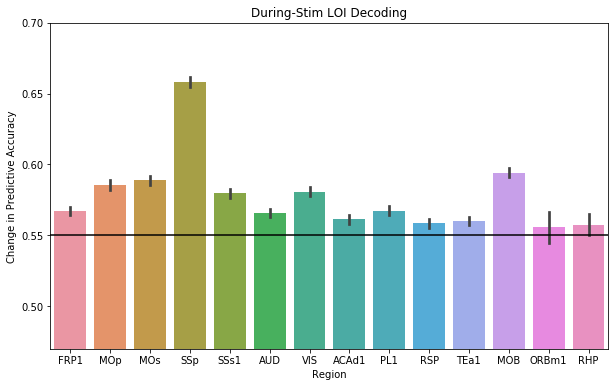

In [57]:
plot_region_loi(np.arange(11,30), "During-Stim LOI Decoding")

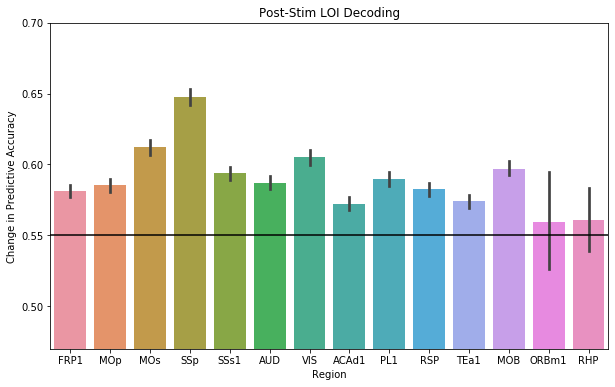

In [58]:
plot_region_loi(np.arange(31,40), "Post-Stim LOI Decoding")

## Zeroing in on certain tasks

In [9]:
task_type = "tacaud"

In [10]:
# Select correct date range
if task_type == "aud":
    date_indices = np.arange(21, 31)
elif task_type == "audtac":
    date_indices = np.arange(31, 41)
elif task_type == "tacaud":
    date_indices = np.arange(41, 68)

In [11]:
# Plots choice decoding averaged: Auditory only
def plot_cd(date_indices):
    plt.figure()
    indices = []
    scores = []
    for idx in date_indices:
        result = results[idx]
        if result['models'][0] is None:
            continue
        num_test_trials = result['test_indices'][0].size
        min_num_trials = 200 # Test and train trials
        if num_test_trials < min_num_trials*0.2:
            continue
        for s_idx, score in enumerate(result['scores']):
            indices.append(s_idx)
            scores.append(score)
    df = pd.DataFrame({
        "Indices": indices, "Scores": scores
        })
    sns.lineplot(x="Indices", y="Scores", data=df)
    plt.ylim((0.5,1.0))
    plt.title("Learning Data Neural Activity", fontsize=14)
    plt.ylabel("Previous Stim Decoding", fontsize=13)
    plt.xticks(
        [10,30],
        ['Stim On', 'Stim Off'],
        fontsize=13
        )
    plt.show()

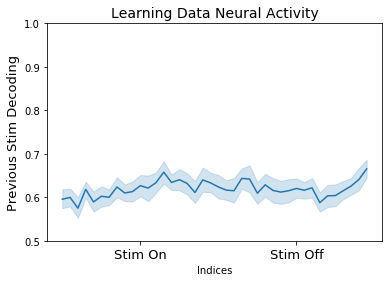

In [12]:
plot_cd(date_indices)

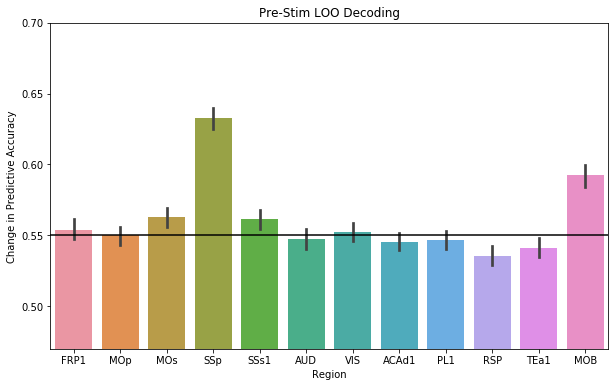

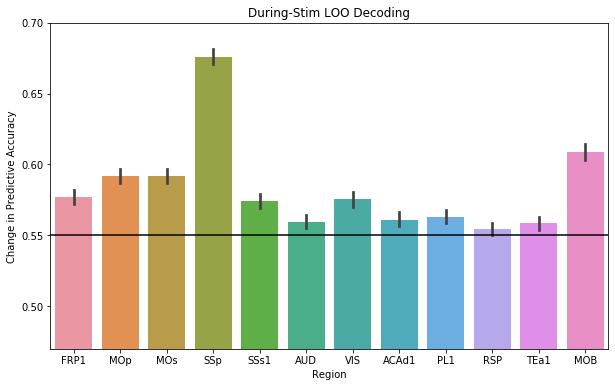

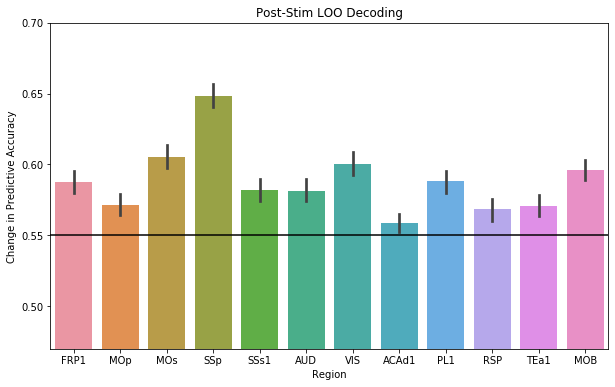

In [76]:
plot_region_loi(
    np.arange(9), "Pre-Stim LOO Decoding", day_range=date_indices)

plot_region_loi(
    np.arange(11,30), "During-Stim LOO Decoding", day_range=date_indices)

plot_region_loi(
    np.arange(31,40), "Post-Stim LOO Decoding", day_range=date_indices)